In [89]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from datetime import datetime

%matplotlib inline

## Read in Articles and People Dictionary

In [90]:
with open('/home/jon/Desktop/thesis/Data/Articles/Annotated/2010_annotated.json', 'r') as f:
    articles = json.load(f)
teams = pickle.load(open('/home/jon/Desktop/thesis/Pickles/2010/team_names.p', 'rb'))
people = pickle.load(open('/home/jon/Desktop/thesis/Pickles/people.p', 'rb'))

names = list(people.keys())

## Calculate Entity Counts

In [94]:
names.extend(teams)  # Make sure team names are counted

In [95]:
entities = {person: 0 for person in names}  # Count up number of articles about each entity

for article in articles:
    for entity in article['Entities']:
        entities[entity] += 1

In [96]:
team_plot = {team: 0 for team in teams}  # Total number of articles about each team
people_plot = {person: 0 for person in list(people.keys())}  # Total number of artcles about each person
team_counts = {team: 0 for team in teams}  # Total number of articles about each team (includes team, players, and coaches)

for entity in entities:
    if entity in teams:
        team_plot[entity] += entities[entity]  # Get already-calculated team counts
        team_counts[entity] += entities[entity]  # Put already-counted articles into proper team
    elif entity in people:  # Need to add that person's count to his team's count
        people_plot[entity] += entities[entity]
        if '2010' in people[entity]:  # ONly for 2010
            team_counts[people[entity]['2010']['team']] += entities[entity]

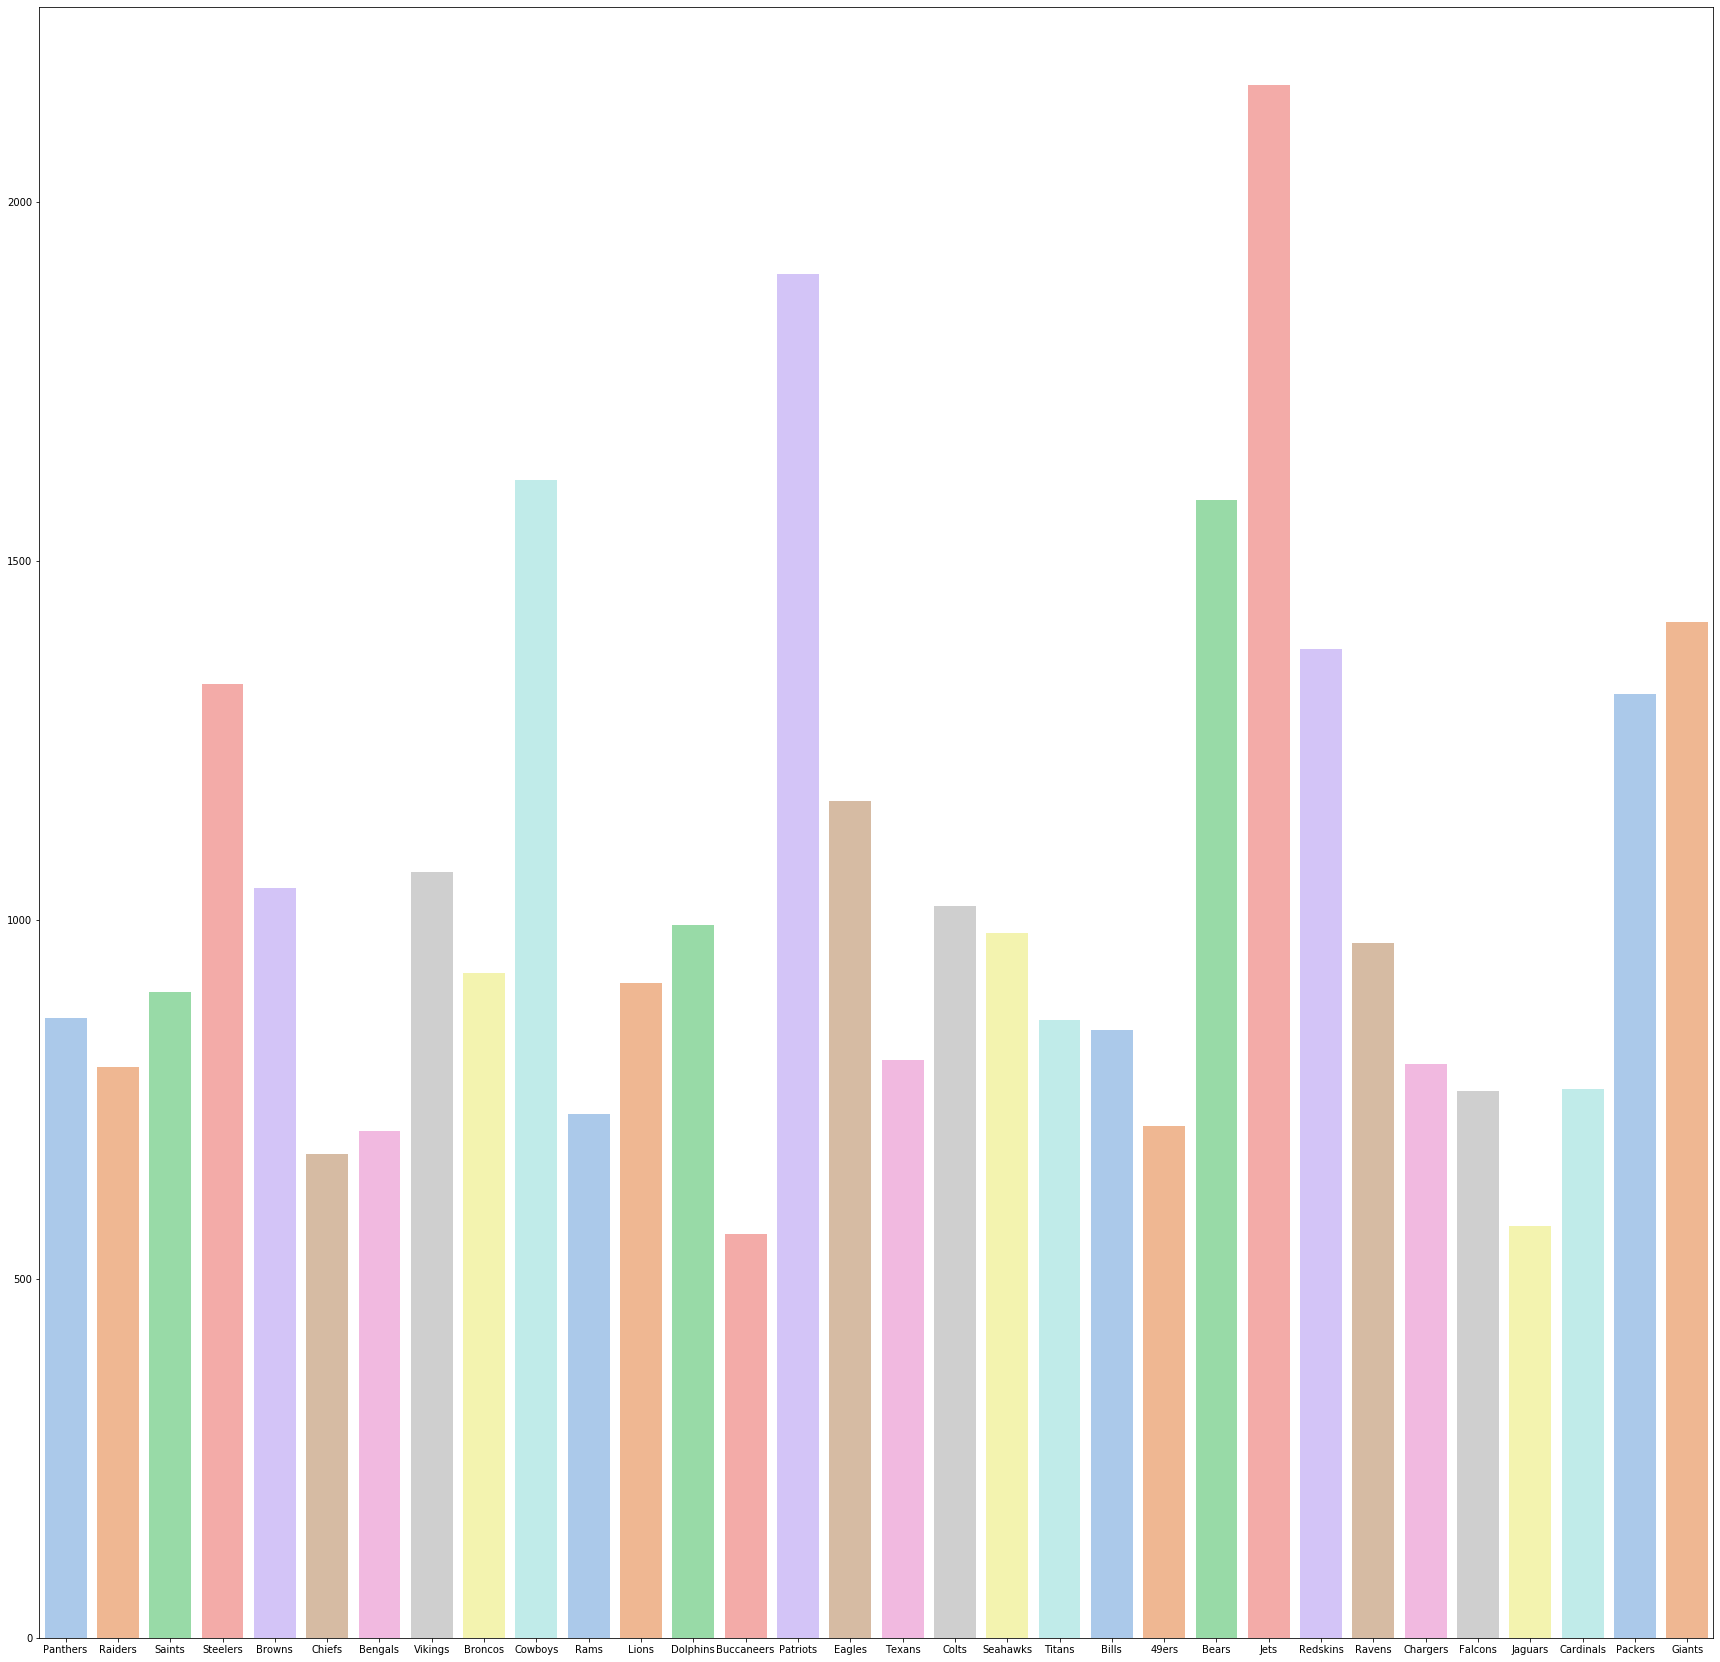

In [97]:
x = np.array(list(team_counts.keys()))
y = np.array(list(team_counts.values()))

fig, ax = plt.subplots(figsize=(30, 30))

sns.barplot(x, y, palette='pastel')

In 2010, the Jets were the most written about team.  The Patriots are a close second!  Now let's look at the top 10 people of 2010.  First, we'll need to sort the dictionary:

In [98]:
sorted_people = sorted(people_plot.items(), key=lambda kv: kv[1], reverse=True)  # Sort so it will be easier to plot top entities

In [99]:
partitioned = [[ i for i, j in sorted_people], [ j for i, j in sorted_people]] 

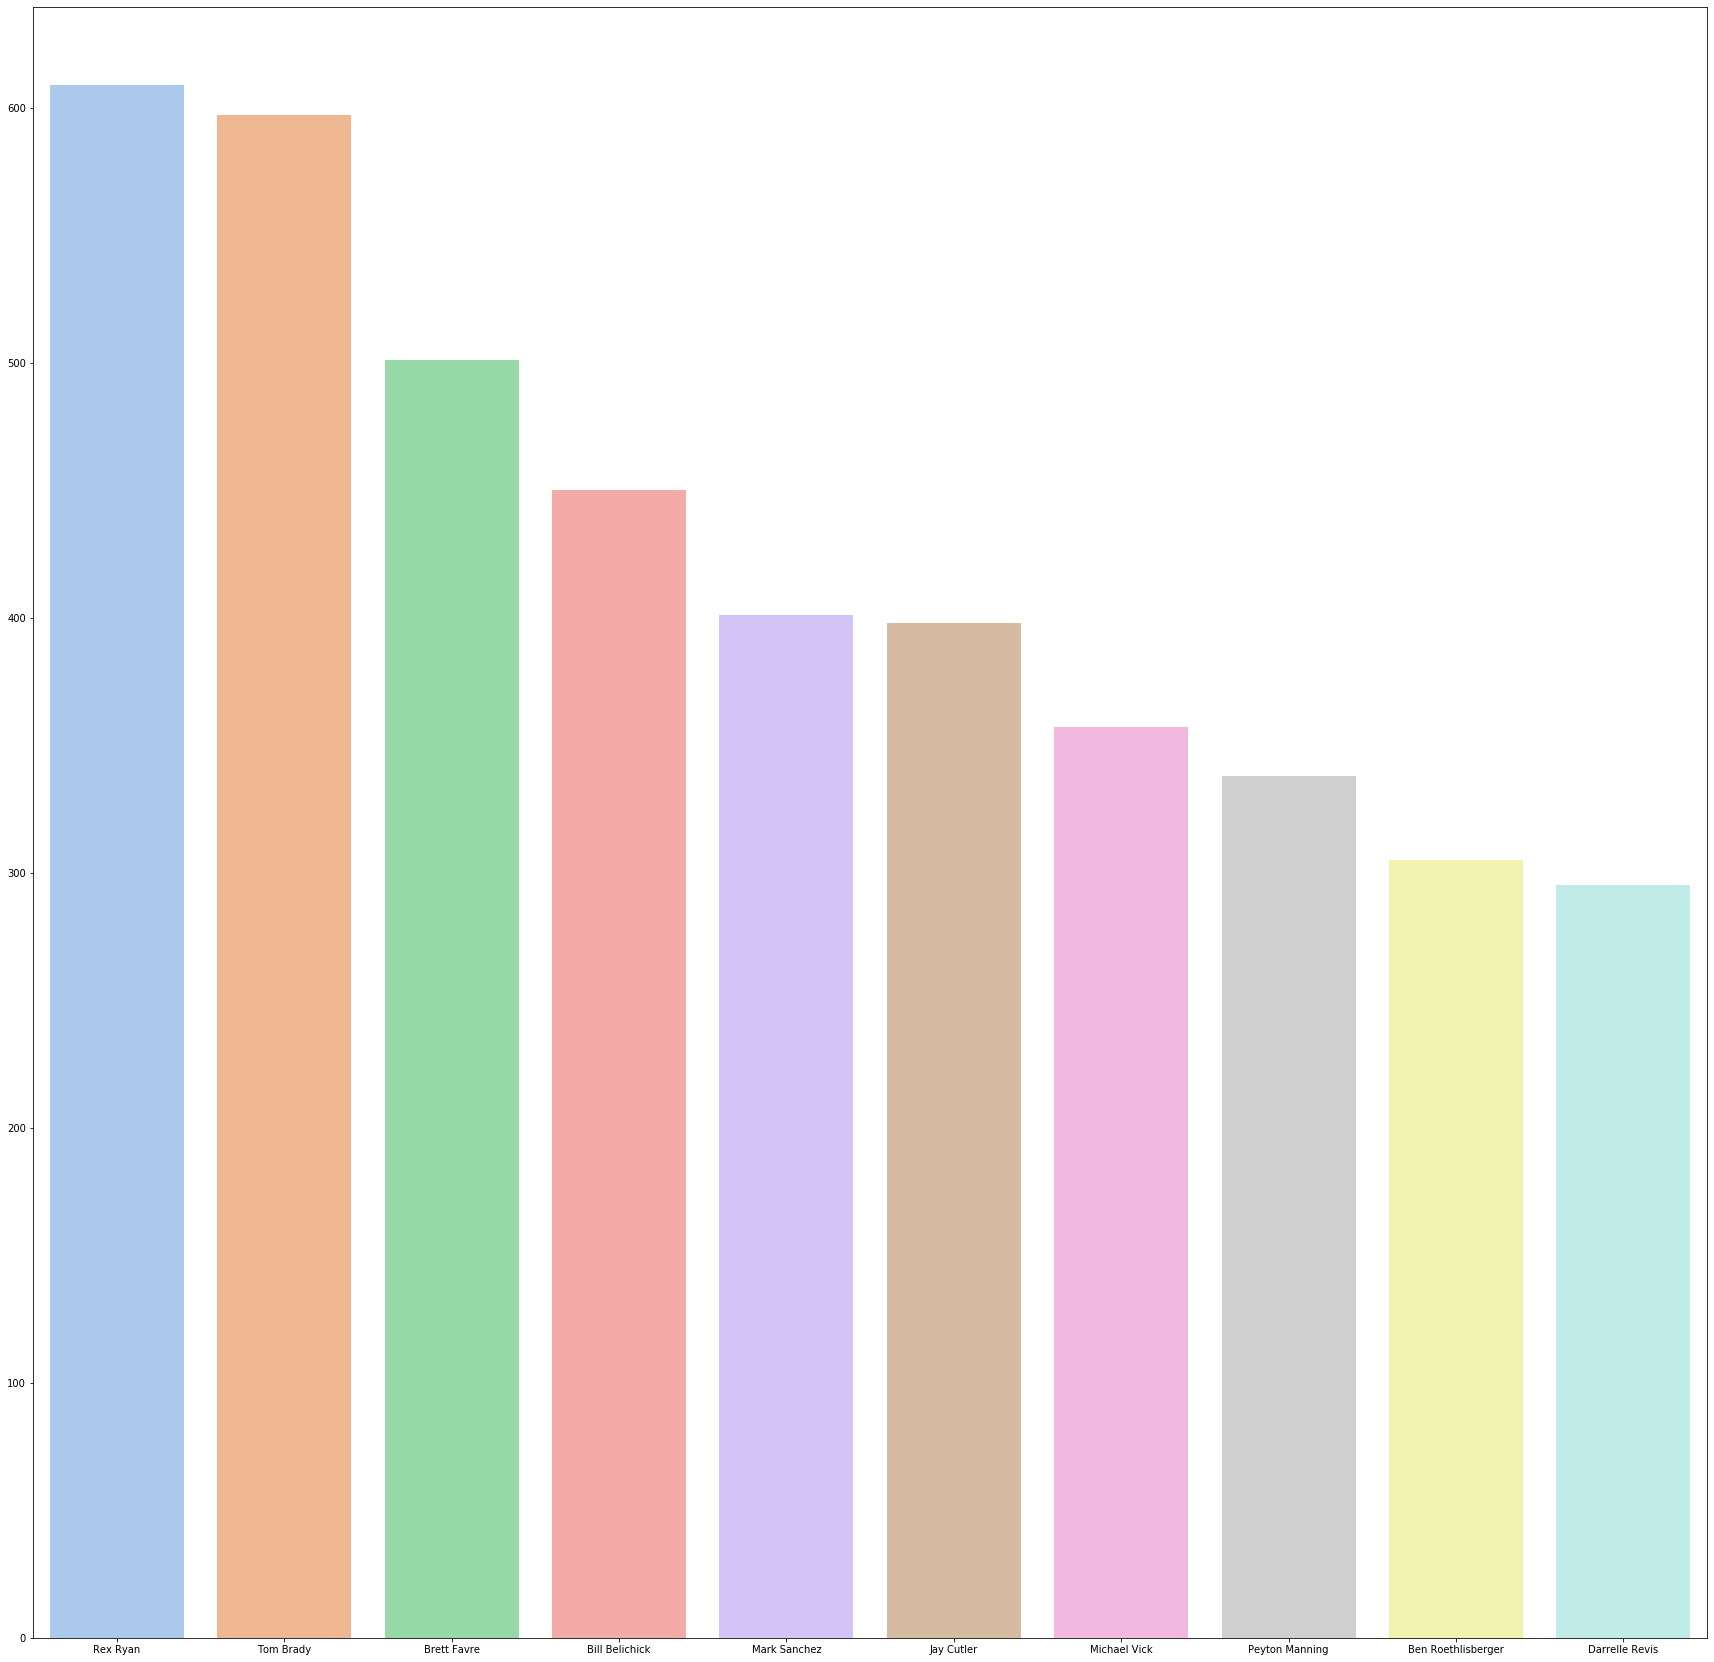

In [100]:
x = np.array(partitioned[0])[:10]
y = np.array(partitioned[1])[:10]

fig, ax = plt.subplots(figsize=(30, 30))

sns.barplot(x, y, palette='pastel')

Rex Ryan was 2010's hottest person to write about, followed by Tom Brady and Brett Favre.

## Tracking through the 2010 season

Rex Ryan was and the Jets were 2010's hottest topics, but how did discussion of them progress over the season?  Let's look at the total number of articles about both the Jets and Rex Ryan, broken down by week.  First, let's make a function to create a dictionary that maps a week to the number of articles published during that week:

In [101]:
weeks = list(pd.DataFrame(articles)['Week'].unique())

In [102]:
def get_week_dictionary(entity, articles, weeks):
    plot = {week: 0 for week in weeks}
    for article in articles:
        if entity in article['Entities']:
            plot[article['Week']] += 1
    
    return plot

Since keys will be unordered, we'll need to modify the dictionary so it's suitable for mapping:

In [103]:
def organize_plot(plot):
    return {
        'Offseason': plot['Offseason'],
        '1': plot['1'],
        '2': plot['2'],
        '3': plot['3'],
        '4': plot['4'],
        '5': plot['5'],
        '6': plot['6'],
        '7': plot['7'],
        '8': plot['8'],
        '9': plot['9'],
        '10': plot['10'],
        '11': plot['11'],
        '12': plot['12'],
        '13': plot['13'],
        '14': plot['14'],
        '15': plot['15'],
        '16': plot['16'],
        '17': plot['17'],
        'Wildcard': plot['Wildcard'],
        'Division': plot['Division'],
        'Conference': plot['Conference'],
        'Superbowl': plot['Superbowl'],
    }

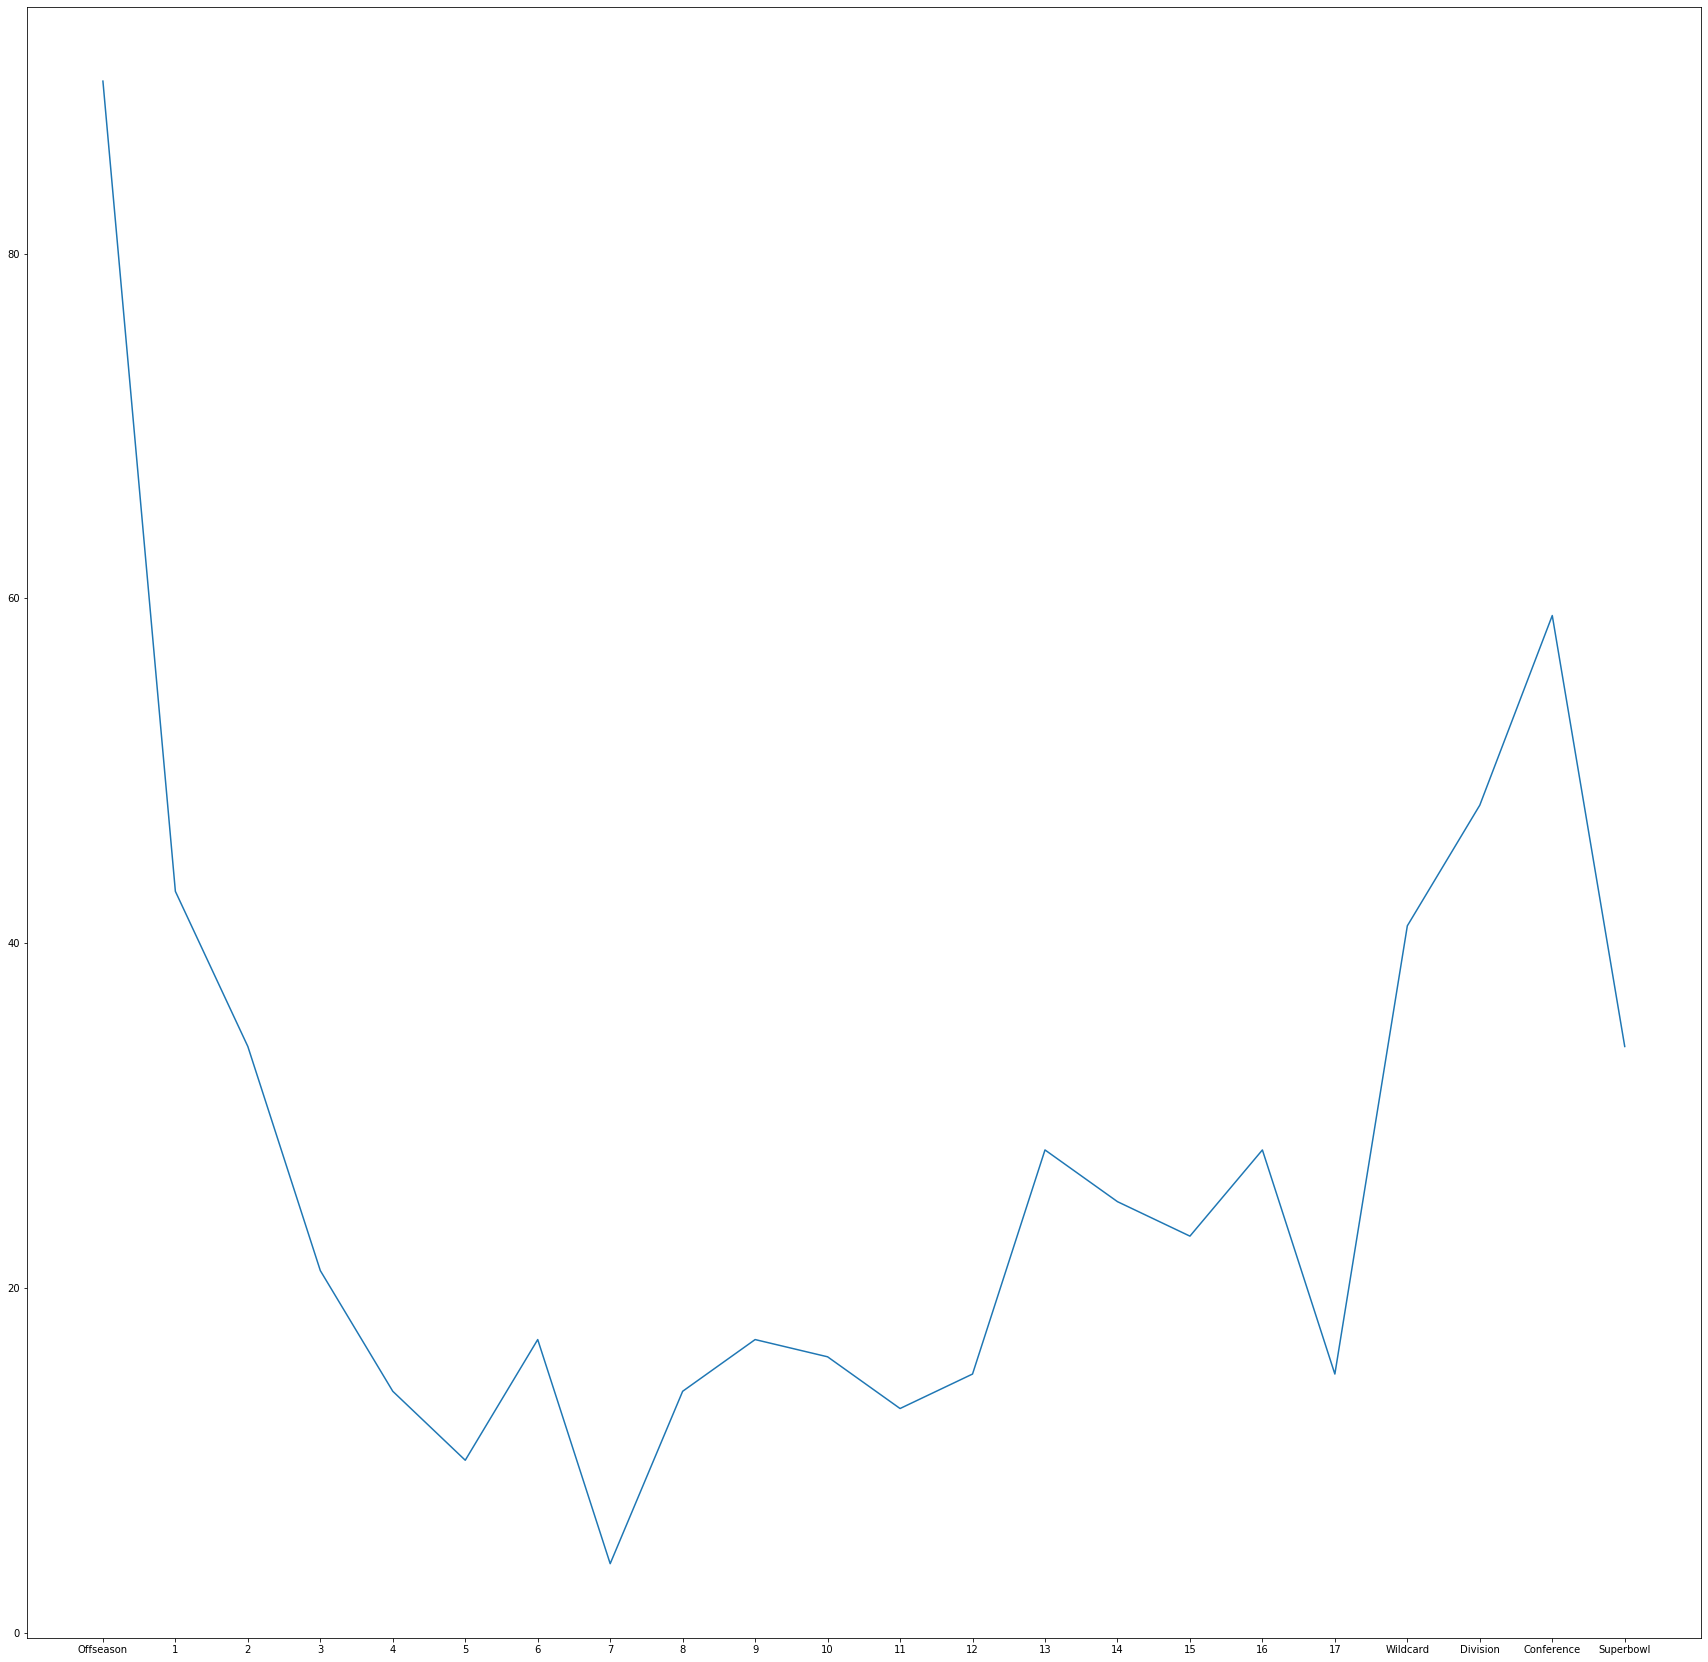

In [104]:
plot = get_week_dictionary('Rex Ryan', articles, weeks)
plot = organize_plot(plot)

x = np.array(list(plot.keys()))
y = np.array(list(plot.values()))

fig, ax = plt.subplots(figsize=(30, 30))

plt.plot(x, y)

There was a lot of week 1 talk about Rex Ryan that slowly died over time.  Now let's look at the Jets as a whole:

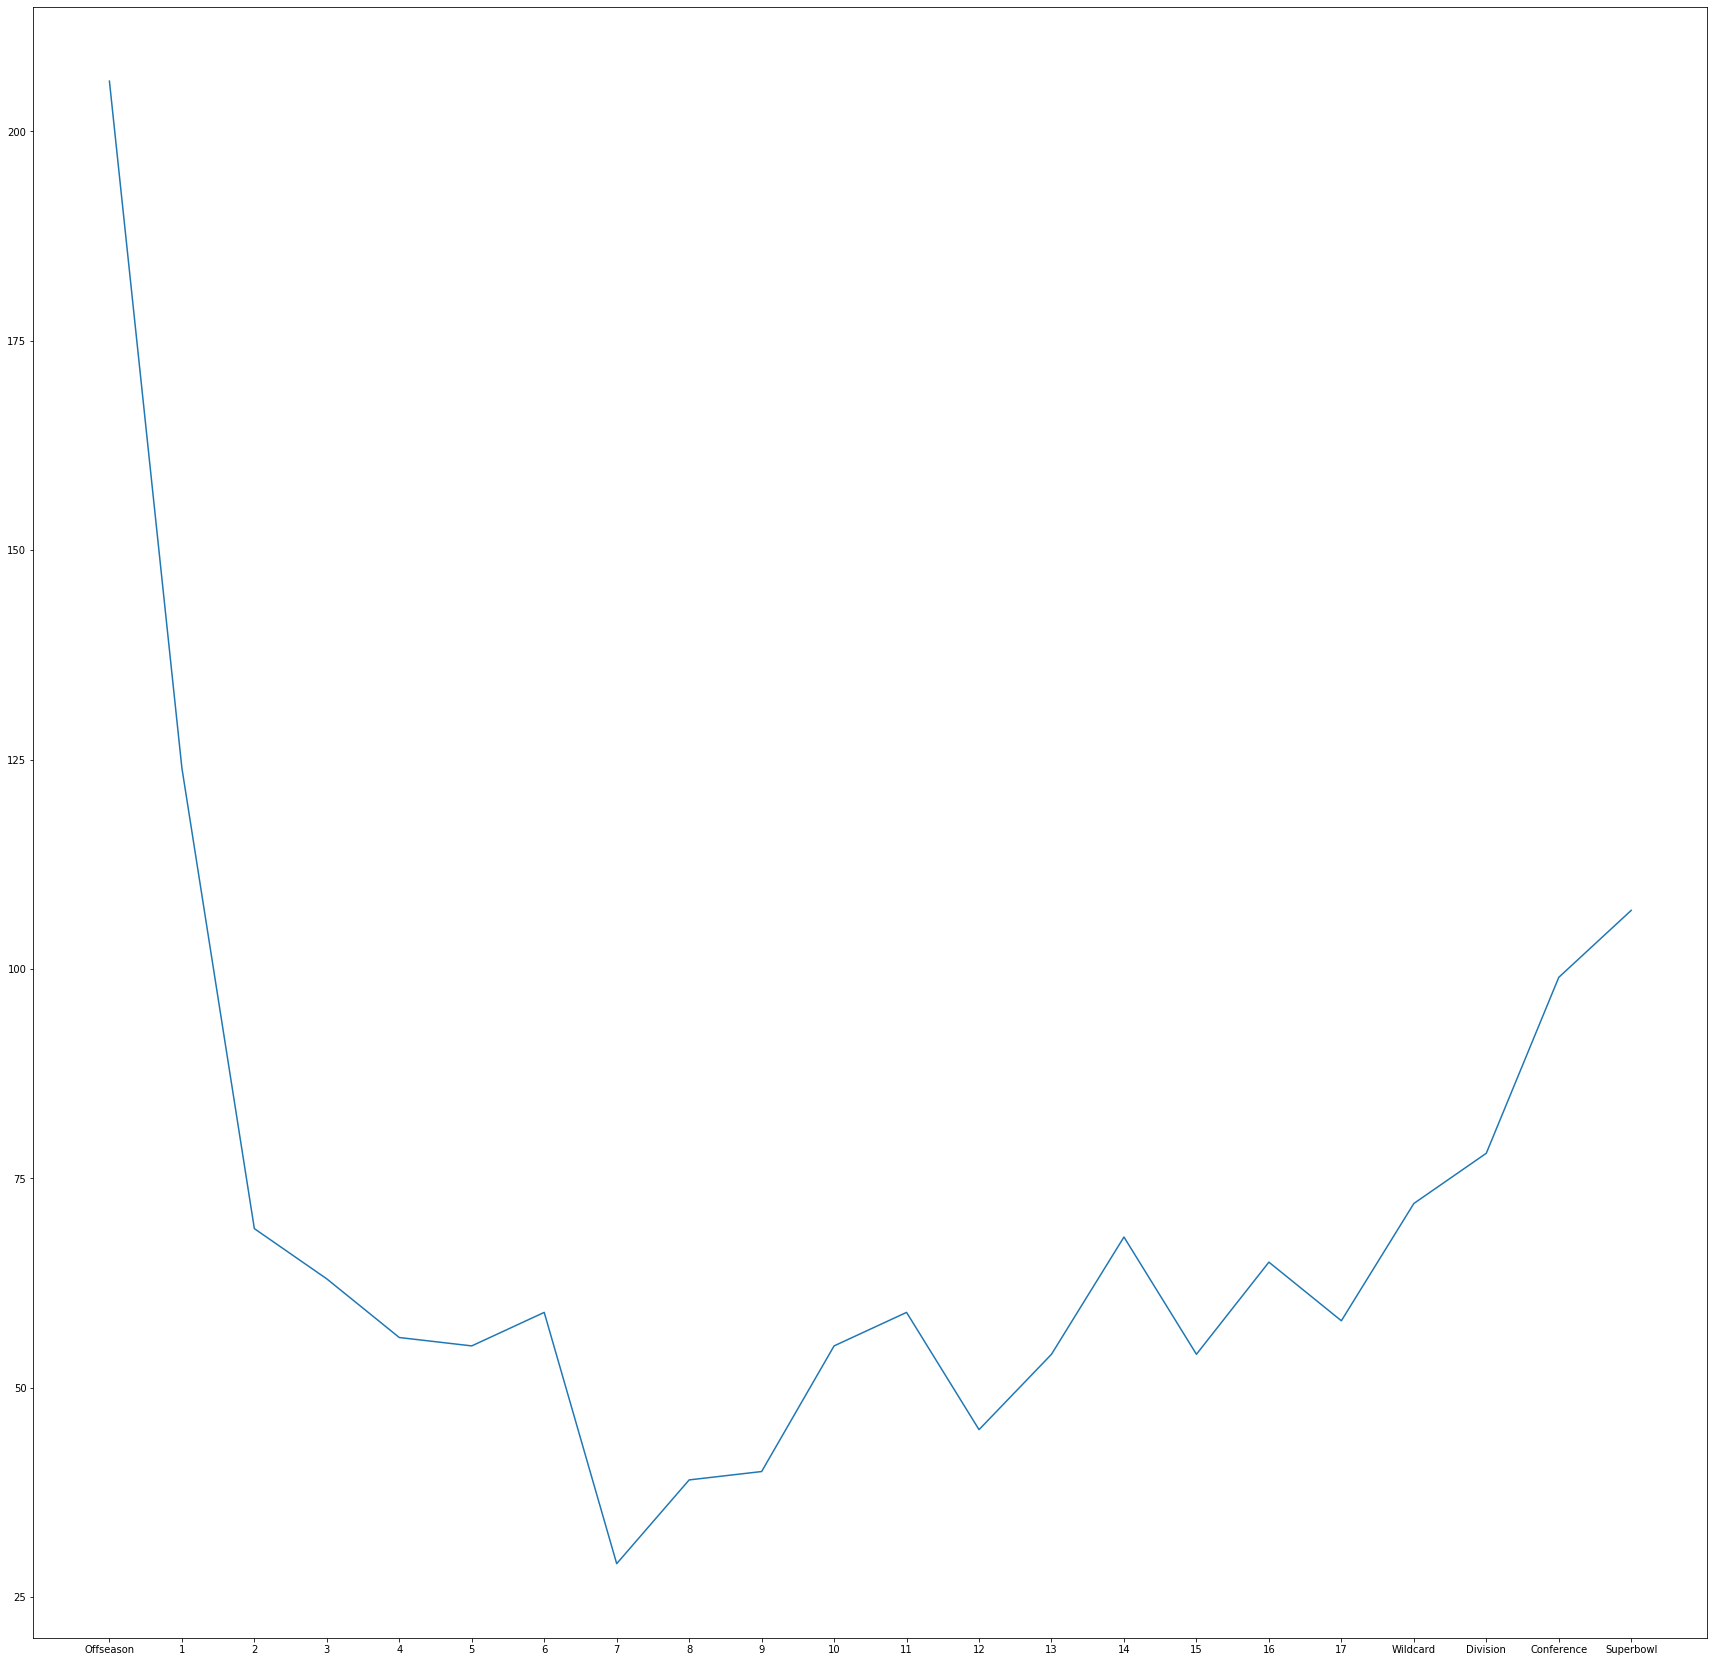

In [105]:
plot = get_week_dictionary('Jets', articles, weeks)
plot = organize_plot(plot)

x = np.array(list(plot.keys()))
y = np.array(list(plot.values()))

fig, ax = plt.subplots(figsize=(30, 30))

plt.plot(x, y)

Now let's see if coverage of the Jets rises or falls after a loss.

## The Losing Effect

First, let's get those game records back:

In [140]:
games = pd.read_csv('/home/jon/Desktop/thesis/Data/Kaggle CSV Files/Games/spreadspoke_scores.csv')
games = games[games['schedule_season'] == 2010]
games = games[['schedule_week', 'team_home', 'team_away', 'score_home', 'score_away']]

In [141]:
home_games = games[games['team_home'] == 'New York Jets']
away_games = games[games['team_away'] == 'New York Jets']

In [142]:
home_games['win'] = home_games['score_home'] > home_games['score_away']
away_games['win'] = away_games['score_home'] < away_games['score_away']

/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
results = pd.concat([home_games, away_games])
results.drop(['team_home', 'team_away', 'score_home', 'score_away'], axis=1, inplace=True)
results.set_index('schedule_week', inplace=True)

In [192]:
week_wins = results.to_dict(orient='index')

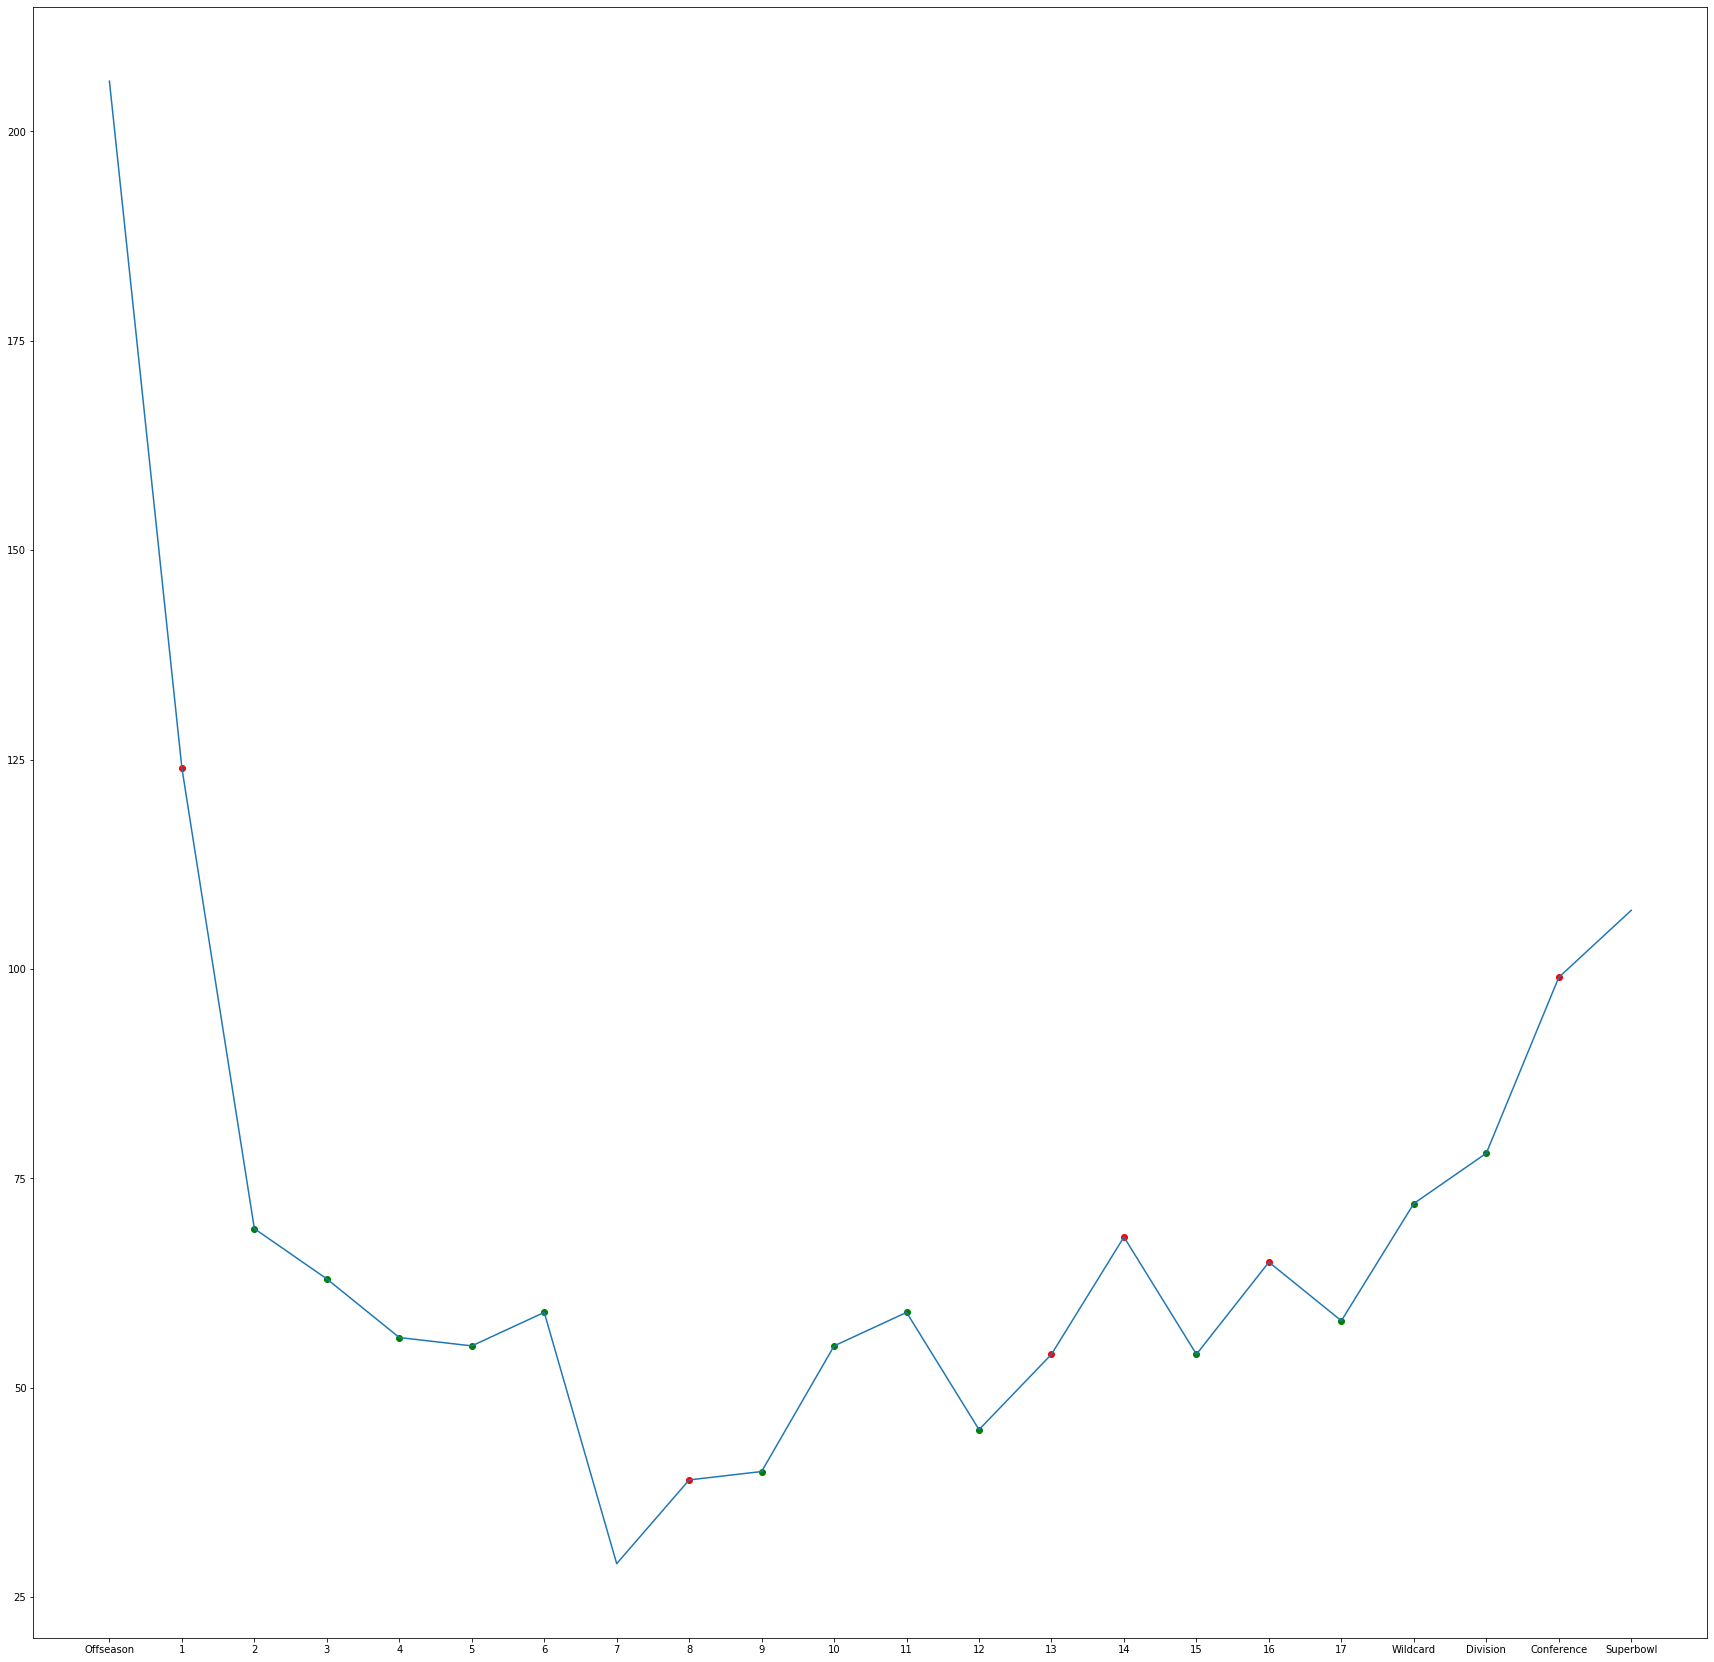

In [193]:
plot = get_week_dictionary('Jets', articles, weeks)
plot = organize_plot(plot)

colors ={True: 'green', False: 'red'}

x = np.array(list(plot.keys()))
y = np.array(list(plot.values()))

fig, ax = plt.subplots(figsize=(30, 30))

plt.plot(x, y)

for i in range(len(x)):
    xc = x[i]
    yc = y[i]
    if xc in week_wins:
        plt.scatter(xc, yc, color=colors[week_wins[xc]['win']])

Despite being on a 4 game win streak, there were few articles being written about the Jets.  The number of articles almost dropped off during their bye week, and went back to normal levels through week 11.  Despite winning more, it again dropped during week 12.  It only rose again during the playofs, when the Jets were defeated during the AFC conference championship.  What about for Rex Ryan?

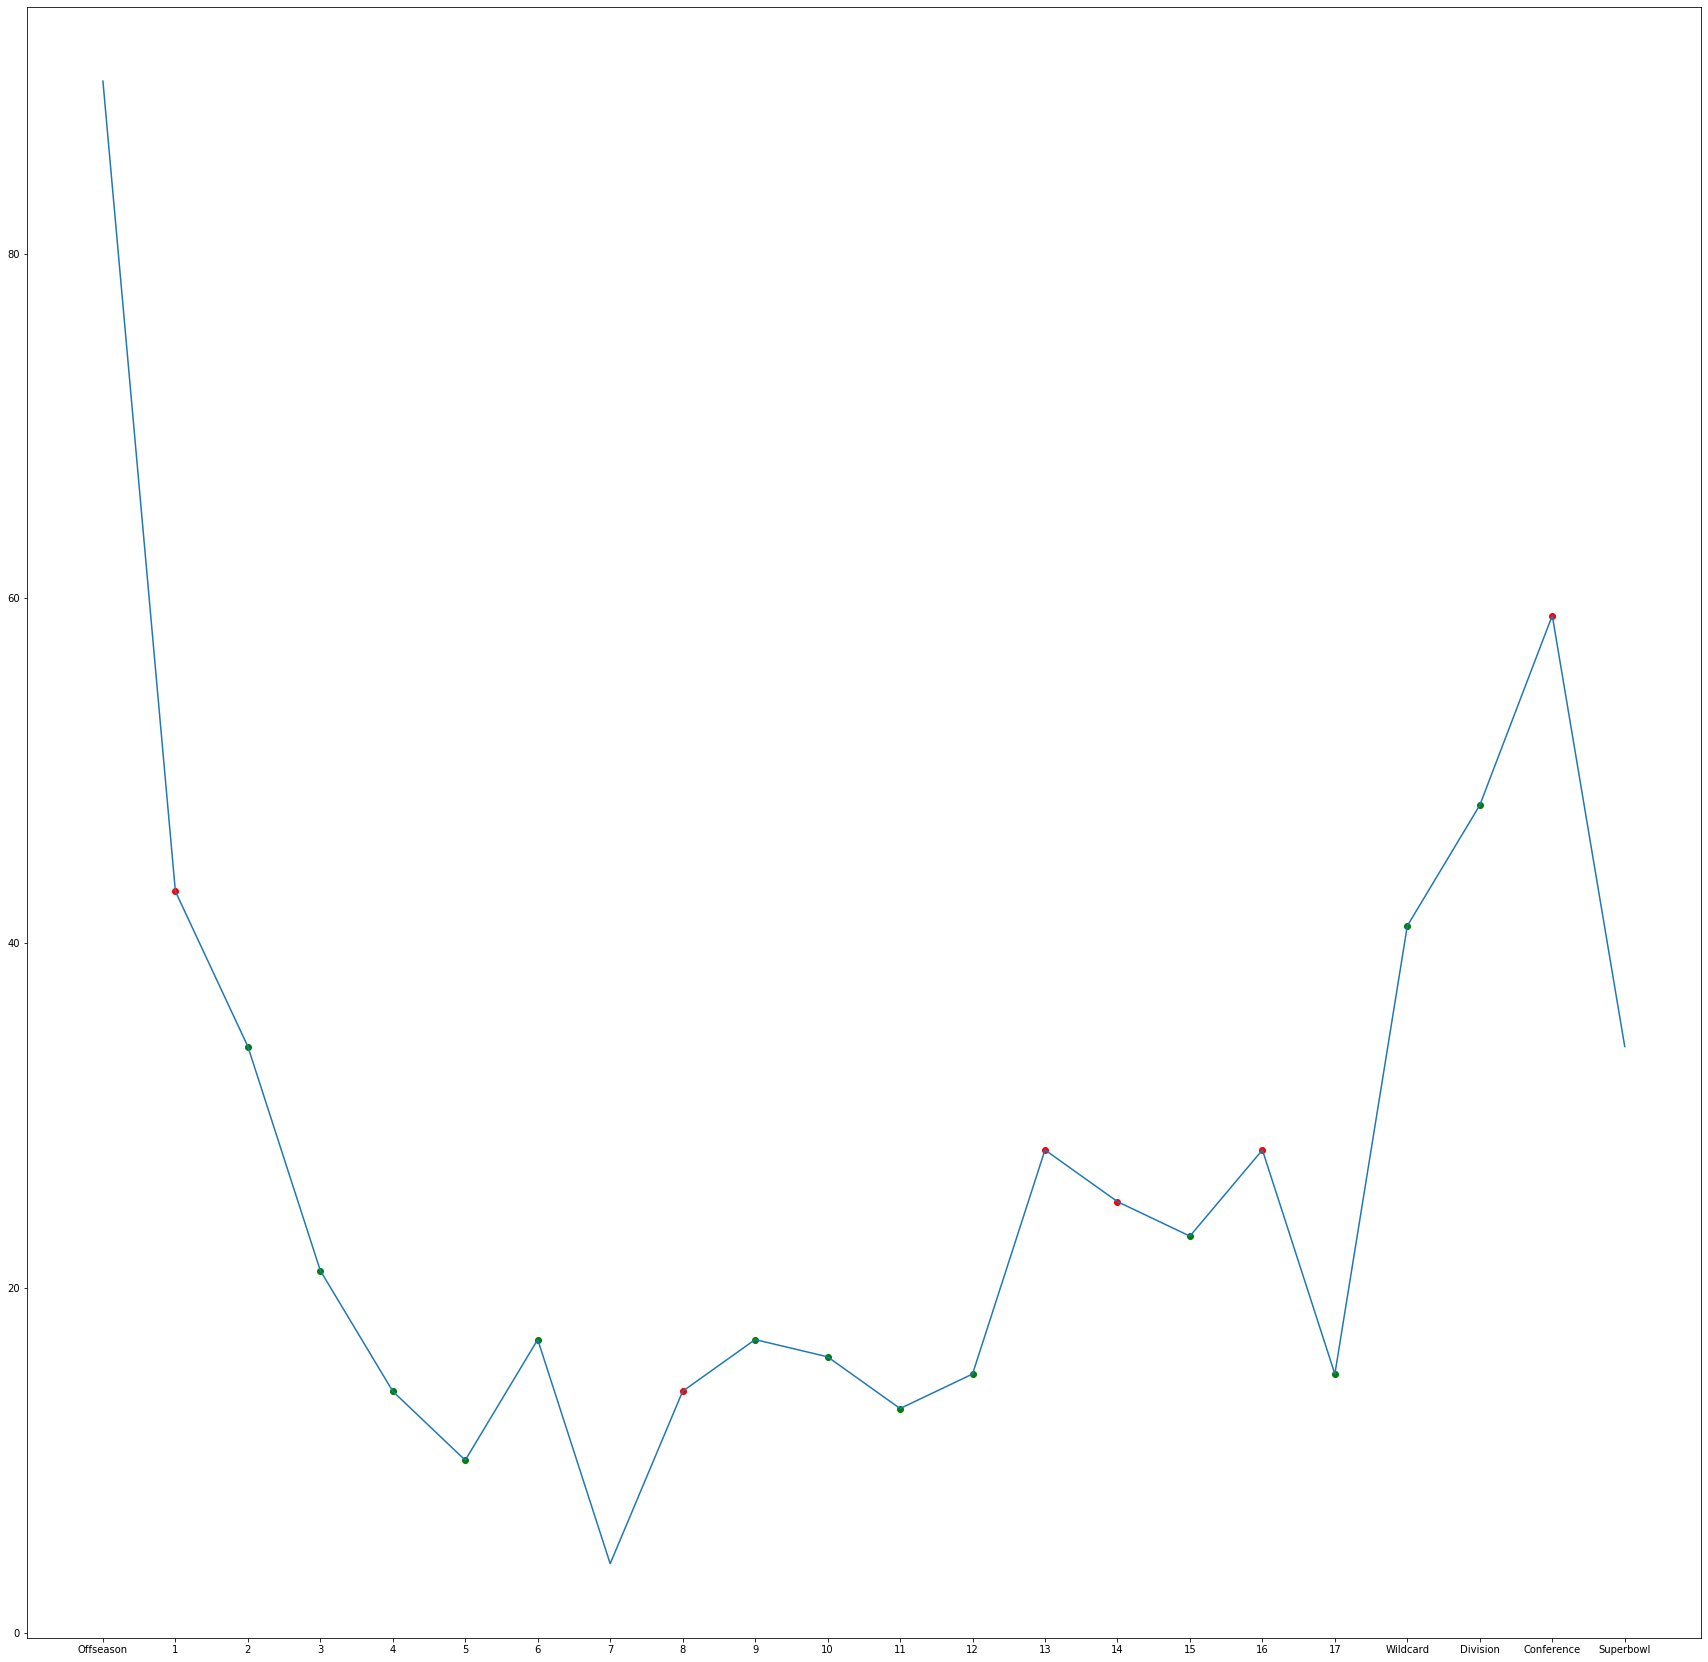

In [195]:
plot = get_week_dictionary('Rex Ryan', articles, weeks)
plot = organize_plot(plot)

colors ={True: 'green', False: 'red'}

x = np.array(list(plot.keys()))
y = np.array(list(plot.values()))

fig, ax = plt.subplots(figsize=(30, 30))

plt.plot(x, y)

for i in range(len(x)):
    xc = x[i]
    yc = y[i]
    if xc in week_wins:
        plt.scatter(xc, yc, color=colors[week_wins[xc]['win']])

The same trend more or less holds true for Rex Ryan.